In [2]:
import torch
import torch.distributions as distrib
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats
%matplotlib inline

plt.style.use('ggplot')

#### Data

In [3]:
n_points = 1000
x = np.linspace(-2, 2, n_points)
z = np.array(np.meshgrid(x, x)).transpose(1, 2, 0)
z = np.reshape(z, [z.shape[0] * z.shape[1], -1])

x_plot = np.linspace(-2, 2, n_points)

### Uniform Distribution

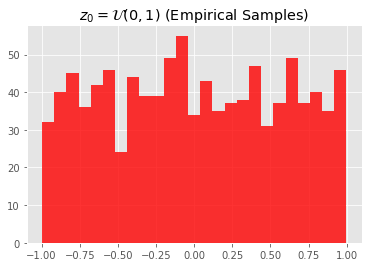

Entropy: tensor(0.6931)


In [4]:

# Base Distribution - Uniform; U(0, 1)
base_distribution = distrib.Uniform(low=-1, high=1)


# Samples from a normal distribution
x_samples = base_distribution.sample((n_points,))

# Plot Empirical Distribution
fig, ax = plt.subplots()

ax.hist(x_samples, bins=25, color='red', alpha=0.8)

ax.set_title(r'$z_0=\mathcal{U}(0,1)$ (Empirical Samples)')
plt.show()

# Get Entropy
x_ent = base_distribution.entropy()

print('Entropy:', x_ent)

#### Probability Density Function (PDF) - Log Probability

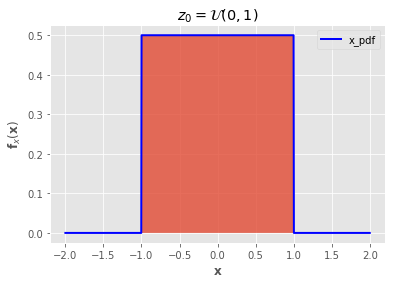

In [5]:
# probability density function
x_pdf = base_distribution.log_prob(torch.Tensor(x)).exp()

# Plot the CDF of Base Distribution
fig, ax = plt.subplots()
ax.plot(x, x_pdf.numpy(), linewidth=2, label='x_pdf', color='blue')
ax.fill_between(x, x_pdf, alpha=0.8)
ax.set_title(r"$z_0=\mathcal{U}(0,1)$")
ax.set_xlabel(r'$\mathbf{x}$')
ax.set_ylabel(r"$\mathbf{f}_x(\mathbf{x})$")
ax.legend()
plt.show()

#### Cumulative Distribution Function (CDF)

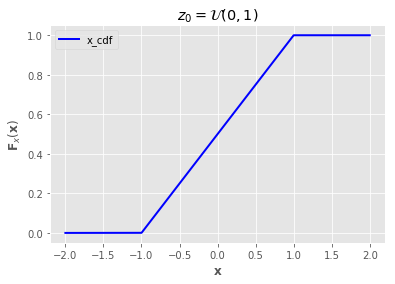

In [6]:
# Cumulative Distribution Function
x_cdf = base_distribution.cdf(torch.Tensor(x))

# Plot the CDF
fig, ax = plt.subplots()
ax.plot(x, x_cdf.numpy(), linewidth=2, label='x_cdf', color='blue')
# ax.fill_between(x, x_cdf, alpha=0.8)
ax.set_title(r"$z_0=\mathcal{U}(0,1)$")
ax.set_xlabel(r'$\mathbf{x}$')
ax.set_ylabel(r"$\mathbf{F}_x(\mathbf{x})$")
ax.legend()
plt.show()

#### Inverse CDF (PPF)

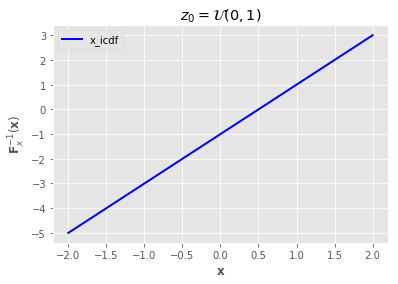

In [7]:
# Cumulative Distribution Function
x_icdf = base_distribution.icdf(torch.Tensor(x))

# Plot the CDF
fig, ax = plt.subplots()
ax.plot(x, x_icdf.numpy(), linewidth=2, label='x_icdf', color='blue')
# ax.fill_between(x, x_cdf, alpha=0.8)
ax.set_title(r"$z_0=\mathcal{U}(0,1)$")
ax.set_xlabel(r'$\mathbf{x}$')
ax.set_ylabel(r"$\mathbf{F}_x^{-1}(\mathbf{x})$")
ax.legend()
plt.show()

### Normal Distribution

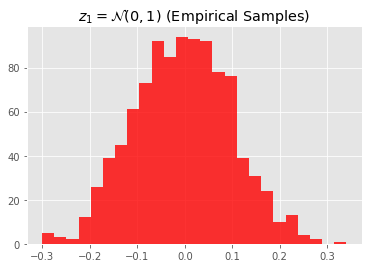

Entropy: tensor(-0.8836)


In [8]:

# Base Distribution - Normal; N(0, 1)
transform_distribution = distrib.Normal(loc=0, scale=0.1)


# Samples from a normal distribution
x_samples = transform_distribution.sample((n_points,))

# Plot Empirical Distribution
fig, ax = plt.subplots()

ax.hist(x_samples, bins=25, color='red', alpha=0.8)

ax.set_title(r'$z_1=\mathcal{N}(0,1)$ (Empirical Samples)')
plt.show()

# Get Entropy
x_ent = transform_distribution.entropy()

print('Entropy:', x_ent)

#### PDF

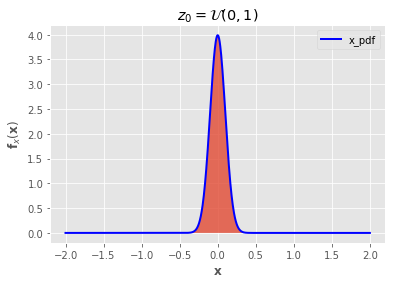

In [9]:
# probability density function
x_pdf = transform_distribution.log_prob(torch.Tensor(x)).exp()

# Plot the CDF of Base Distribution
fig, ax = plt.subplots()
ax.plot(x, x_pdf.numpy(), linewidth=2, label='x_pdf', color='blue')
ax.fill_between(x, x_pdf, alpha=0.8)
ax.set_title(r"$z_0=\mathcal{U}(0,1)$")
ax.set_xlabel(r'$\mathbf{x}$')
ax.set_ylabel(r"$\mathbf{f}_x(\mathbf{x})$")
ax.legend()
plt.show()

#### CDF

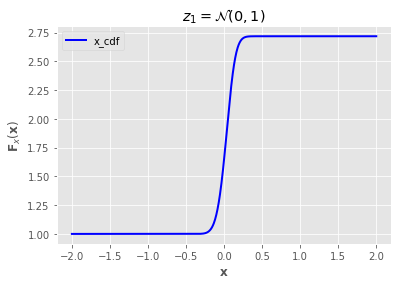

In [10]:
# Cumulative Distribution Function
x_cdf = transform_distribution.cdf(torch.Tensor(x)).exp()

# Plot the CDF
fig, ax = plt.subplots()
ax.plot(x, x_cdf.numpy(), linewidth=2, label='x_cdf', color='blue')
# ax.fill_between(x, x_cdf, alpha=0.8)
ax.set_title(r"$z_1=\mathcal{N}(0,1)$")
ax.set_xlabel(r'$\mathbf{x}$')
ax.set_ylabel(r"$\mathbf{F}_x(\mathbf{x})$")
ax.legend()
plt.show()

#### ICDF

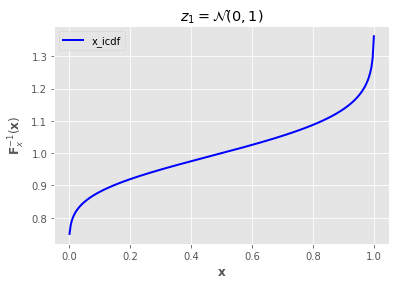

In [11]:
# Cumulative Distribution Function
x_icdf = transform_distribution.icdf(torch.Tensor(x)).exp()

# Plot the CDF
fig, ax = plt.subplots()
ax.plot(x, x_icdf.numpy(), linewidth=2, label='x_icdf', color='blue')
# ax.fill_between(x, x_cdf, alpha=0.8)
ax.set_title(r"$z_1=\mathcal{N}(0,1)$")
ax.set_xlabel(r'$\mathbf{x}$')
ax.set_ylabel(r"$\mathbf{F}_x^{-1}(\mathbf{x})$")
ax.legend()
plt.show()

## Inverse Sampling Theorem

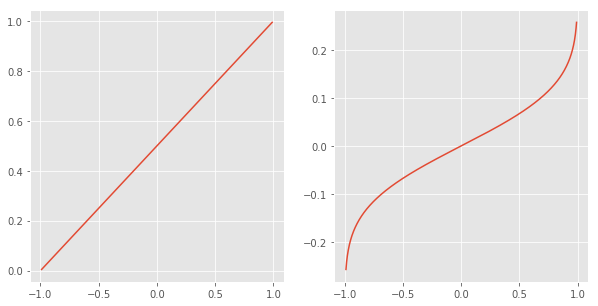

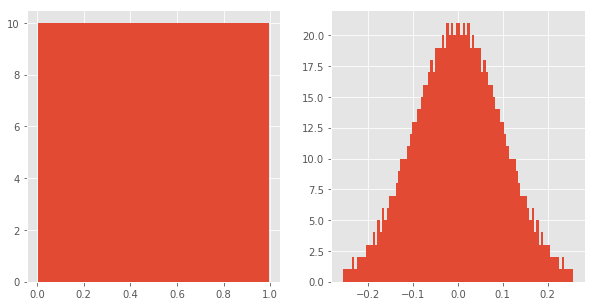

In [12]:
# Data (u)
z = np.linspace(-0.99, 0.99, 1000)

# Start from Uniform Distribution Base Distribution
base_dist = distrib.Uniform(low=-1, high=1)

# Normal Distribution Transformation
normal_dist = distrib.Normal(loc=0, scale=0.1)


# ==============
# Distributions
# ==============

# CDF of Base Distribution (F(u))
z_cdf = base_dist.cdf(torch.tensor(z))

# ICDF of Gaussian Distribution (F^1(u))
x_transform = normal_dist.icdf(z_cdf)

# =======
# Plots
# =======

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(z, z_cdf.numpy())
ax[1].plot(z, x_transform.numpy())

plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].hist(z_cdf.numpy(), bins=100)
ax[1].hist(x_transform.numpy(), bins=100)

plt.show()

Some things to note is the boundary issues. If we were to input a vector that was greater than the bounds fof the uniform distribution then we have infinite values because it is outside of the domain.

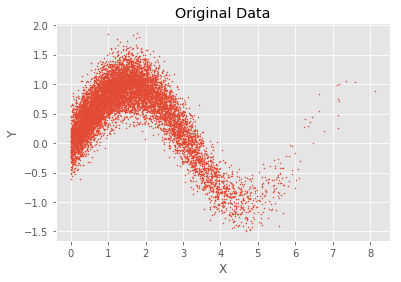

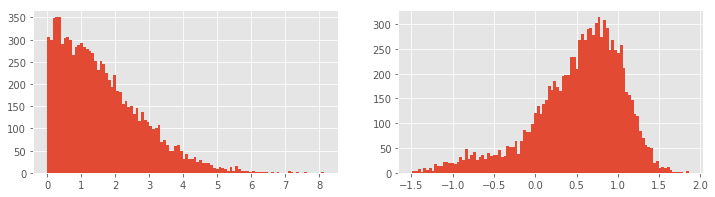

In [13]:
# Data
seed = 123
n_samples = 10000
rng = np.random.RandomState(seed)

x = np.abs(2 * rng.randn( n_samples, 1))
y = np.sin(x) + 0.25 * rng.randn(n_samples, 1)
data = np.hstack((x, y))

# Plot Data
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Original Data')
plt.show()

# Plot Marginal Histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
ax[0].hist(data[:, 0], bins=100)
ax[1].hist(data[:, 1], bins=100)
plt.show()

#### Histogram Approximation

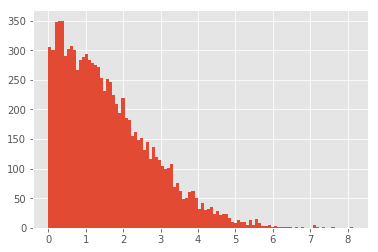

In [14]:
fig, ax = plt.subplots()

ax.hist(data[:, 0], bins=100)
plt.show()

hist, bin_edges = np.histogram(data[:, 0], bins=100)

hist = np.array(hist, dtype=float)
hist += 1e-10



In [15]:
hist_dist = scipy.stats.rv_histogram((hist, bin_edges))

x_cdf = hist_dist.cdf(np.sort(data[:, 0]))
x_icdf = hist_dist.ppf(np.sort(data[:, 0]))

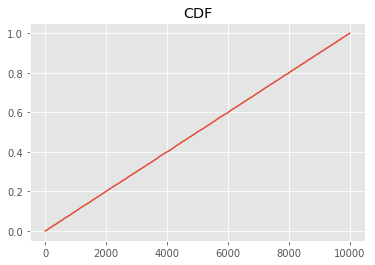

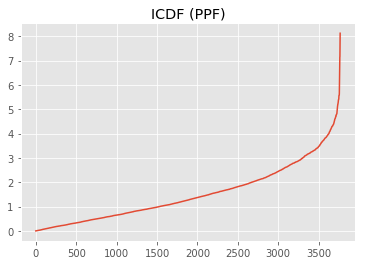

In [16]:
fig, ax = plt.subplots()

ax.plot(x_cdf)
ax.set_title('CDF')
plt.show()

fig, ax = plt.subplots()

ax.plot(x_icdf)
ax.set_title('ICDF (PPF)')
plt.show()

In [18]:
# x_transform.numpy()

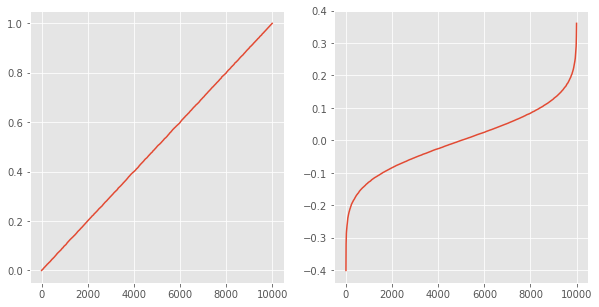

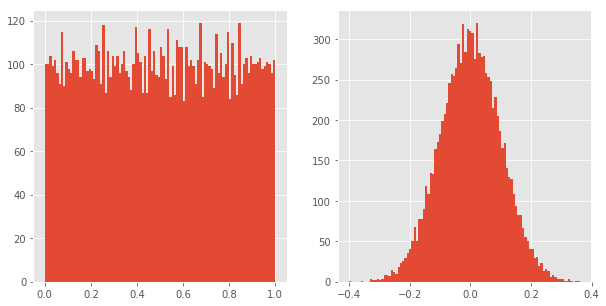

In [19]:


# ICDF of Gaussian Distribution (F^1(u))
x_transform = normal_dist.icdf(torch.tensor(x_cdf)).numpy()

# Deal with the boundaries
x_transform = x_transform[(x_transform > -np.inf) & (x_transform < np.inf) ]

# =======
# Plots
# =======

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(x_cdf)
ax[1].plot(x_transform)

plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].hist(x_cdf, bins=100)
ax[1].hist(x_transform, bins=100)

plt.show()

#### KDE Approximation

In [20]:
%%time
# Initialize and fit KDE method to data
kde_est = sm.nonparametric.KDEUnivariate(data[:, 0], )

kde_est.fit(bw='scott')


CPU times: user 198 ms, sys: 7.93 ms, total: 206 ms
Wall time: 142 ms


In [21]:
%%time 
x_cdf = kde_est.cdf
x_icdf = kde_est.icdf

CPU times: user 1min 31s, sys: 0 ns, total: 1min 31s
Wall time: 45.5 s


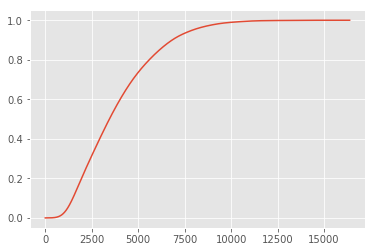

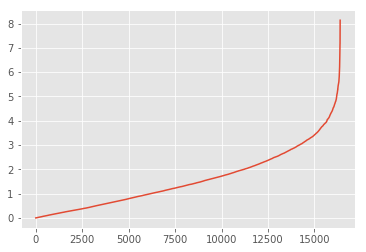

In [ ]:

fig, ax = plt.subplots()

ax.plot(x_cdf)

plt.show()

fig, ax = plt.subplots()

ax.plot(x_icdf)
plt.show()


In [ ]:
kde_est.support.shape

(16384,)

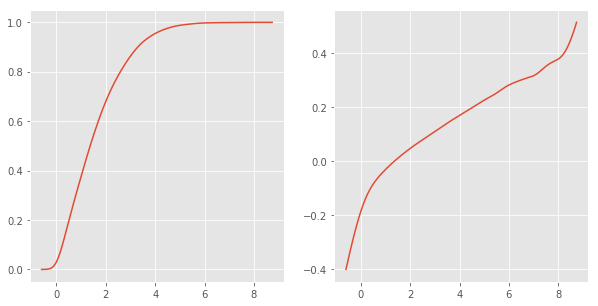

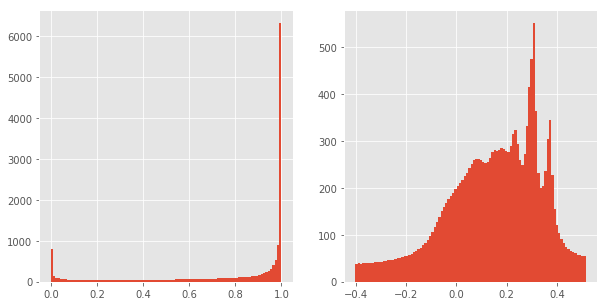

In [ ]:
# ICDF of Gaussian Distribution (F^1(u))
x_transform = normal_dist.icdf(torch.tensor(kde_est.cdf))

# =======
# Plots
# =======

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(kde_est.support, kde_est.cdf)
ax[1].plot(kde_est.support, x_transform.numpy())

plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].hist(kde_est.cdf, bins=100)
ax[1].hist(x_transform.numpy(), bins=100)

plt.show()

#### KDE + Histograms

In [ ]:
hist, bin_edges = np.histogram(data[:, 0], bins=50)

hist = np.array(hist, dtype=float)
hist += 1e-10

In [ ]:
%%time
# Initialize and fit KDE method to data
kde_est = sm.nonparametric.KDEUnivariate(hist, )

kde_est.fit(bw='scott')

CPU times: user 714 µs, sys: 2 ms, total: 2.71 ms
Wall time: 2.82 ms


In [ ]:
%%time 
x_cdf = kde_est.cdf
x_icdf = kde_est.icdf

CPU times: user 231 ms, sys: 1.86 ms, total: 232 ms
Wall time: 234 ms


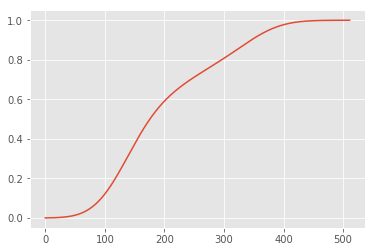

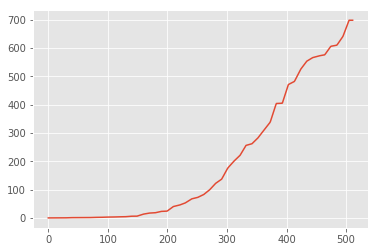

In [ ]:

fig, ax = plt.subplots()

ax.plot(x_cdf)

plt.show()

fig, ax = plt.subplots()

ax.plot(x_icdf)
plt.show()

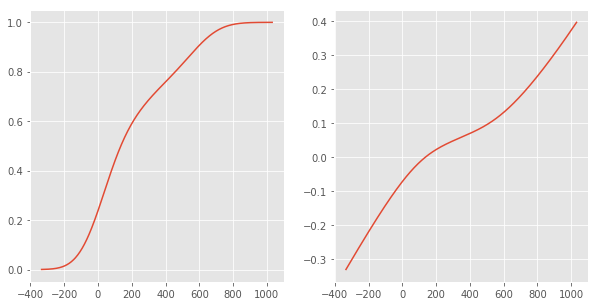

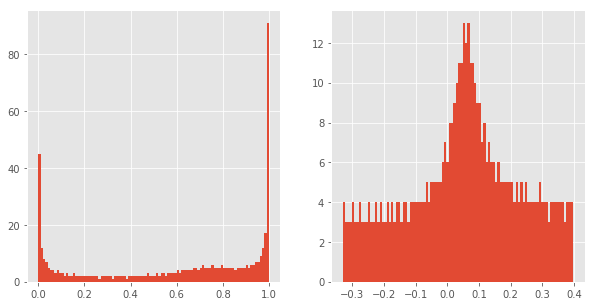

In [ ]:
# ICDF of Gaussian Distribution (F^1(u))
x_transform = normal_dist.icdf(torch.tensor(kde_est.cdf))

# =======
# Plots
# =======

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(kde_est.support, kde_est.cdf)
ax[1].plot(kde_est.support, x_transform.numpy())

plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].hist(kde_est.cdf, bins=100)
ax[1].hist(x_transform.numpy(), bins=100)

plt.show()

#### Independent Density Destructor (Normal Distribution)

In [ ]:
uni_dist = scipy.stats.uniform

uni_dist.fit(data[:, 0])

x_ucdf = norm_dist.cdf(np.sort(data[:, 0]))
x_uicdf = norm_dist.ppf(np.sort(data[:, 0]))

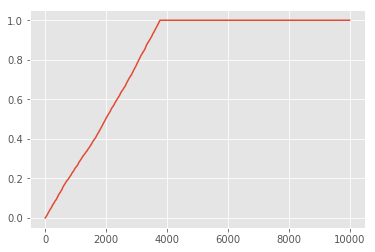

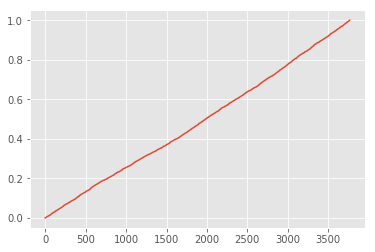

In [ ]:

fig, ax = plt.subplots()

ax.plot(x_ucdf)

plt.show()

fig, ax = plt.subplots()

ax.plot(x_uicdf)
plt.show()

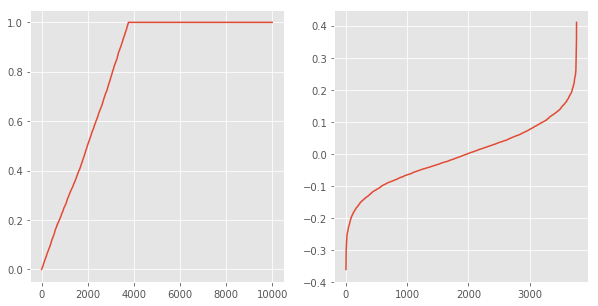

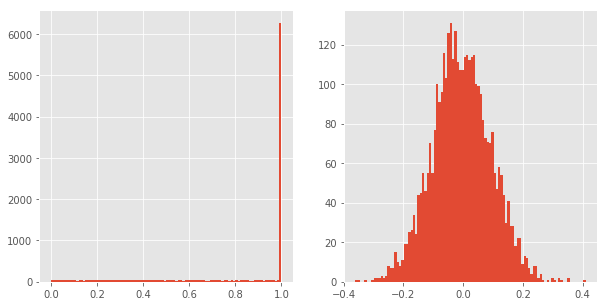

In [ ]:
# ICDF of Gaussian Distribution (F^1(u))
x_transform = normal_dist.icdf(torch.tensor(x_ucdf)).numpy()

# Deal with the boundaries
x_transform = x_transform[(x_transform > -np.inf) & (x_transform < np.inf) ]

# =======
# Plots
# =======

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(x_ucdf)
ax[1].plot(x_transform)

plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].hist(x_ucdf, bins=100)
ax[1].hist(x_transform, bins=100)
plt.show()

#### Independent Density Destructor (Normal Distribution)

In [ ]:
norm_dist = scipy.stats.uniform

norm_dist.fit(data[:, 0])

x_ncdf = norm_dist.cdf(np.sort(data[:, 0]))
x_nicdf = norm_dist.ppf(np.sort(data[:, 0]))

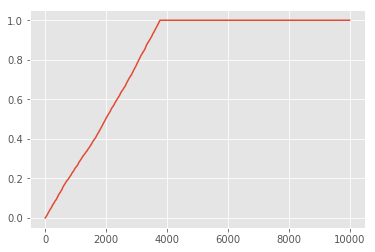

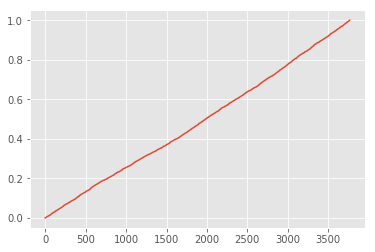

In [ ]:

fig, ax = plt.subplots()

ax.plot(x_ncdf)

plt.show()

fig, ax = plt.subplots()

ax.plot(x_nicdf)
plt.show()

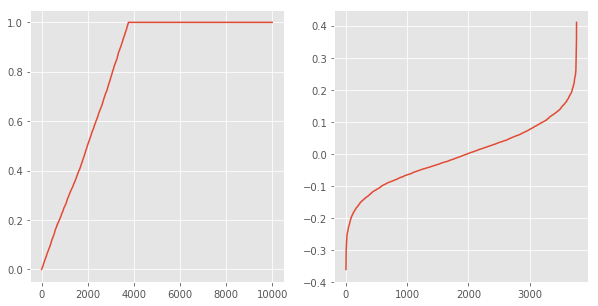

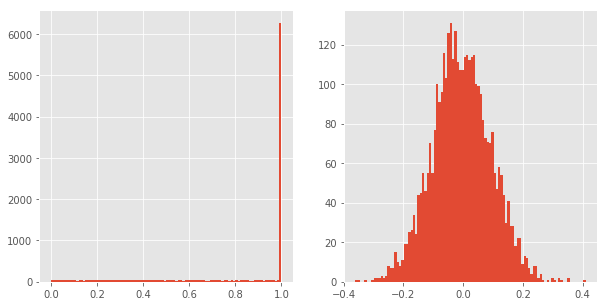

In [ ]:
# ICDF of Gaussian Distribution (F^1(u))
x_transform = normal_dist.icdf(torch.tensor(x_ncdf)).numpy()

# Deal with the boundaries
x_transform = x_transform[(x_transform > -np.inf) & (x_transform < np.inf) ]

# =======
# Plots
# =======

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(x_ncdf)
ax[1].plot(x_transform)

plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].hist(x_ncdf, bins=100)
ax[1].hist(x_transform, bins=100)
plt.show()